In [1]:
from coreLib.dataset import DataSet
data_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source"
ds=DataSet(data_dir)
ds.common.symbols.df

#LOG     :All paths found


  0%|          | 0/200840 [00:00<?, ?it/s]

  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/bangla/dictionary.csv


  0%|          | 0/1059977 [00:00<?, ?it/s]

  0%|          | 0/46101 [00:00<?, ?it/s]

  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :converting int labels to string


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/english/dictionary.csv


  0%|          | 0/370098 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.graphemes


  0%|          | 0/200840 [00:00<?, ?it/s]

#LOG     :bangla.numbers


  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :english.graphemes


  0%|          | 0/46101 [00:00<?, ?it/s]

#LOG     :english.numbers


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :common.symbols


  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.fonts


  0%|          | 0/21 [00:00<?, ?it/s]

#LOG     :english.fonts


  0%|          | 0/2682 [00:00<?, ?it/s]

#LOG     :common.background


  0%|          | 0/982 [00:00<?, ?it/s]

#LOG     :common.noise.random


  0%|          | 0/112763 [00:00<?, ?it/s]

#LOG     :common.noise.sign


  0%|          | 0/3240 [00:00<?, ?it/s]

,filename,label,img_path
0,symbol_0,>,/media/ansary/DriveData/Work/bengalAI/datasets...
1,symbol_1,>,/media/ansary/DriveData/Work/bengalAI/datasets...
2,symbol_2,>,/media/ansary/DriveData/Work/bengalAI/datasets...
3,symbol_3,>,/media/ansary/DriveData/Work/bengalAI/datasets...
4,symbol_4,>,/media/ansary/DriveData/Work/bengalAI/datasets...
...,...,...,...
5970,symbol_5970,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5971,symbol_5971,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5972,symbol_5972,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5973,symbol_5973,<,/media/ansary/DriveData/Work/bengalAI/datasets...


In [4]:
def padImg(line_img,h_max,w_max):
    # shape
    h,w=line_img.shape
    # pad widths
    left_pad_width =(w_max-w)//2   # <<<<<<<<==========
    # print(left_pad_width)
    right_pad_width=w_max-w-left_pad_width   # <<<<<<<<==========
    # pads
    left_pad =np.zeros((h,left_pad_width))
    right_pad=np.zeros((h,right_pad_width))
    # pad
    line_img =np.concatenate([left_pad,line_img,right_pad],axis=1)
    
    # shape
    h,w=line_img.shape
    # pad heights
    top_pad_height =(h_max-h)//2
    bot_pad_height=h_max-h-top_pad_height
    # pads
    top_pad =np.zeros((top_pad_height,w))
    bot_pad=np.zeros((bot_pad_height,w))
    # pad
    line_img =np.concatenate([top_pad,line_img,bot_pad],axis=0)
    return line_img

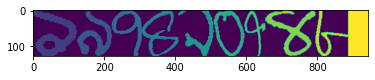

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np
iden=2
from coreLib.word import create_word
img,label,iden=create_word(iden,
                            "bangla",
                            "handwritten",
                            "number",
                            ds,
                            use_dict=True)
# max neutralization
plt.imshow(img)
plt.show()


In [6]:
w_max=0
h_max=0
iden=2
imgs=[]
labels=[]
padded=[]
for _ in range(10):
    img,label,iden=create_word(iden,
                            "bangla",
                            "handwritten",
                            "grapheme",
                            ds,
                            use_dict=True)

    h,w=img.shape
    if w>w_max:
        w_max=w
    if h>h_max:
        h_max=h

    imgs.append(img)
    labels.append(label)
    

    w_max+=32
    h_max+=32

for img in imgs:
    img=padImg(img,h_max,w_max) ### <<<<<================= Call Function
    padded.append(img)
    

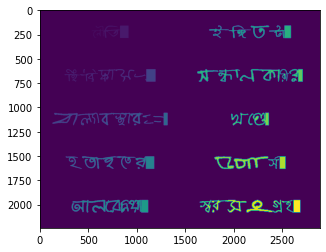

[{2: 'নৌ', 3: 'তি', 4: ' '}, {5: 'হি', 6: 'বি', 7: 'স্কা', 8: 'স', 9: '-', 10: '.', 11: ' '}, {12: 'বা', 13: 'ল্যা', 14: 'ব', 15: 'স্থা', 16: 'র', 17: '=', 18: '=', 19: ' '}, {20: 'হ', 21: 'তা', 22: 'হ', 23: 'তে', 24: 'র', 25: ' '}, {26: 'আ', 27: 'ল', 28: 'বে', 29: 'নি', 30: 'য়া', 31: ' '}, {32: 'ই', 33: 'ঙ্গি', 34: 'ত', 35: 'টা', 36: ' '}, {37: 'স', 38: 'ন্ধা', 39: 'ন', 40: 'কা', 41: 'রী', 42: 'র', 43: ' '}, {44: 'খ', 45: 'ণ্ডে', 46: ' '}, {47: 'ড', 48: 'পা', 49: 'র্স', 50: ' '}, {51: 'স্ব', 52: 'র', 53: 'স', 54: 'ং', 55: 'গ্র', 56: 'হ', 57: ' '}]


In [10]:
#random_page_image 
p1=padded[:5]
p2=padded[5:]
p1=np.concatenate(p1,axis=0)
p2=np.concatenate(p2,axis=0)
page=np.concatenate([p1,p2],axis=1)
plt.imshow(page)
plt.show()
print(labels)

# Complete the following function

In [25]:
def convertToTotalText(page,labels,rotations=None):
    '''
        @author
        create a function to convert page image to total text format data
        This should not depend on- 
            * language or 
            * type (handwritten/printed) or 
            * data(number/word/symbol)
        args:
            page   :     marked image of a page given at letter by letter 
            labels :     list of markings for each word
        returns:
            whatever is necessary for the total-text format
        FUTURE:
            * Rotation will be added after render class 
    '''
    # your code starts from here 
    # after finalization change returns segment under doc string above
    
    # char mask
    char_mask=np.zeros(page.shape)
    for label in labels:
        for k,v in label.items():
            if v!=' ':
                char_mask[page==k]=255

    char_mask=np.expand_dims(char_mask,axis=-1)
    char_mask=np.concatenate([char_mask,char_mask,char_mask],axis=-1)
    char_mask=char_mask.astype("uint8")
    # word_mask
    word_mask=np.zeros(page.shape)
    for label in labels:
        for k,v in label.items():
            if v!=' ':
                idx = np.where(page==k)
                y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])

                word_mask[y_min:y_max+1,x_min:x_max+1]=255

    word_mask=np.expand_dims(word_mask,axis=-1)
    word_mask=np.concatenate([word_mask,word_mask,word_mask],axis=-1)
    word_mask=word_mask.astype("uint8")
    # bounding box format text file
    text_lines=[]
    
    return char_mask,word_mask,text_lines


# Demos to help get going
* pixel level ground truth
    * charecter mask
    * word mask
* Text level Ground truth
    * -------
    * --------


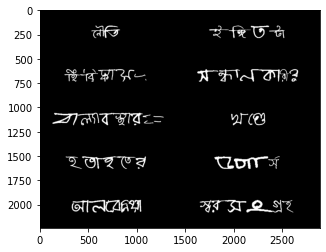

In [11]:
char_mask=np.zeros(page.shape)
for label in labels:
    for k,v in label.items():
        if v!=' ':
            char_mask[page==k]=255

char_mask=np.expand_dims(char_mask,axis=-1)
char_mask=np.concatenate([char_mask,char_mask,char_mask],axis=-1)
char_mask=char_mask.astype("uint8")
plt.imshow(char_mask)
plt.show()

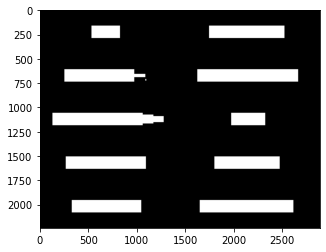

In [12]:
word_mask=np.zeros(page.shape)
for label in labels:
    for k,v in label.items():
        if v!=' ':
            idx = np.where(page==k)
            y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])

            word_mask[y_min:y_max+1,x_min:x_max+1]=255

word_mask=np.expand_dims(word_mask,axis=-1)
word_mask=np.concatenate([word_mask,word_mask,word_mask],axis=-1)
word_mask=word_mask.astype("uint8")
plt.imshow(word_mask)
plt.show()